# Setup

In [1]:
# Import packages
import pandas as pd
from ds_common_utils.aux.io.snowflake_tools import SnowflakeTools
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Setup connection
con = SnowflakeTools(
    role="INSIGHT_ANALYST_MERCH_DE_GENERAL_PRD",
    warehouse="INSIGHT_ANALYST_WH",
    database="BDWPRD_DE",
    schema="IA_MERCH_DE"
)

In [3]:
# Date range
start_date = "'2024-06-18'"
end_date = "'2025-06-18'"

In [4]:
# Updated function with `field` for demographic segment and `level` for groupings like sub-department
def generate_segment_charts(df, field, level):
    sub_charts = {}
    segment_order = df[field].drop_duplicates().tolist()

    for group_val in df[level].drop_duplicates():
        df_sub = df[df[level] == group_val].copy()

        df_sub[field] = pd.Categorical(df_sub[field], categories=segment_order, ordered=True)
        df_sub.sort_values(field, inplace=True)

        def get_color(index):
            if index > 1.2:
                return "green"
            elif index < 0.8:
                return "red"
            else:
                return "grey"

        colors = df_sub["SALES_INDEX"].apply(get_color)

        fig, ax = plt.subplots(figsize=(6, 4))
        bars = ax.barh(range(len(df_sub)), df_sub["SEGMENT_SALES"] / 1e6, color=colors)

        ax.set_yticks(range(len(df_sub)))
        ax.set_yticklabels(df_sub[field])

        for i, bar in enumerate(bars):
            idx_val = df_sub.iloc[i]["SALES_INDEX"]
            ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f"{idx_val:.2f}",
                    va='center', ha='left', fontsize=10, color=colors.iloc[i])

        ax.set_title(f"Sales by {field}\n{group_val}")
        ax.set_xlabel("Sales ($M)")

        # Only keep left and bottom borders
        for spine_name in ["top", "right"]:
            ax.spines[spine_name].set_visible(False)

        plt.tight_layout()
        sub_charts[group_val] = fig

    return sub_charts

# 300 PEST CONTROL

## Data

In [5]:
# Set item range table name
table_PC = 'PC_item_range' + datetime.today().strftime('%Y_%m_%d')

In [6]:
# Create temp item table
con.execute_statement_from_sql_file(
    file='sql/0-item-range.sql',
    formatting={'table_name': table_PC,
                'filter' : "AND item_department_name = '300 PEST CONTROL' "})

snowflake_tools - 2025-06-19 21:48:11.545684+10:00 - Generating new token with 'INSIGHT_ANALYST_MERCH_DE_GENERAL_PRD' role and 'SESSION:ROLE-ANY' scope...
snowflake_tools - 2025-06-19 21:48:17.644035+10:00 - Saved token with '2025-06-20 01:48:17+10:00' expiry...


## Demographic Segments (AU)

In [7]:
PC_ds = con.read_sql_file_into_pandas(
    file="sql/1-demographic-segments.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_PC,
        'level' : 'item_sub_department_name',
        'country' : 'AU' 
    }
)

In [8]:
# Check data
PC_ds.head(7)

,ITEM_SUB_DEPARTMENT_NAME,DEMOGRAPHIC_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,400 ANIMAL CONTROL,Homeowner older kids,142267.22,6490.0,4711,2003863.09,93283.0,66658,4454030.85,375149.0,...,1637108,0.070996,0.069573,0.070674,0.079992,0.077637,0.075973,0.887540,0.896132,0.930252
1,400 ANIMAL CONTROL,Homeowner younger kids,286179.76,12781.0,9280,2003863.09,93283.0,66658,9915695.67,810303.0,...,1637108,0.142814,0.137013,0.139218,0.178081,0.167693,0.162289,0.801959,0.817050,0.857840
2,400 ANIMAL CONTROL,Older homeowner,1092302.00,51747.0,36312,2003863.09,93283.0,66658,24695826.85,2190508.0,...,1637108,0.545098,0.554731,0.544751,0.443526,0.453326,0.435847,1.229010,1.223690,1.249867
3,400 ANIMAL CONTROL,Renter no kids,118663.40,5535.0,4257,2003863.09,93283.0,66658,4832988.20,444158.0,...,1637108,0.059217,0.059336,0.063863,0.086798,0.091919,0.112929,0.682240,0.645523,0.565515
4,400 ANIMAL CONTROL,Renter with kids,107385.39,4928.0,3734,2003863.09,93283.0,66658,4414681.00,397124.0,...,1637108,0.053589,0.052828,0.056017,0.079286,0.082185,0.091459,0.675900,0.642800,0.612482
5,400 ANIMAL CONTROL,Unclassifiable,18236.59,823.0,578,2003863.09,93283.0,66658,407141.30,36614.0,...,1637108,0.009101,0.008823,0.008671,0.007312,0.007577,0.007732,1.244615,1.164351,1.121443
6,400 ANIMAL CONTROL,Younger homeowner,238828.73,10979.0,7786,2003863.09,93283.0,66658,6960308.42,578220.0,...,1637108,0.119184,0.117696,0.116805,0.125004,0.119663,0.113771,0.953443,0.983560,1.026668


/tmp/ipykernel_27318/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


{'400 ANIMAL CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 CRAWLING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 ELECTRONIC INSECT CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 FLYING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 MOSQUITO CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 PEST CONTROL OFF RANGE': <Figure size 600x400 with 1 Axes>,
 '400 RODENT PEST CONTROL': <Figure size 600x400 with 1 Axes>}

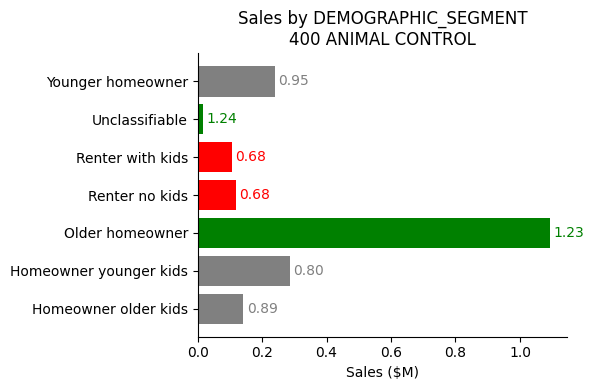

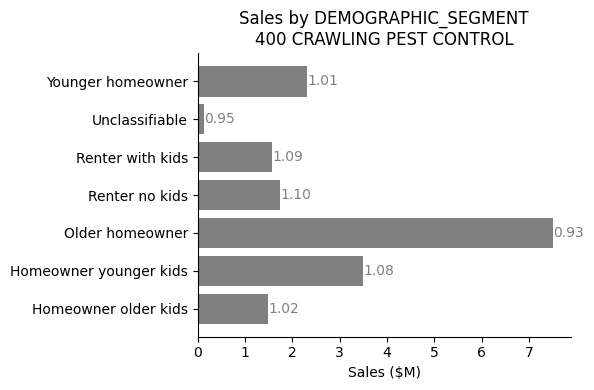

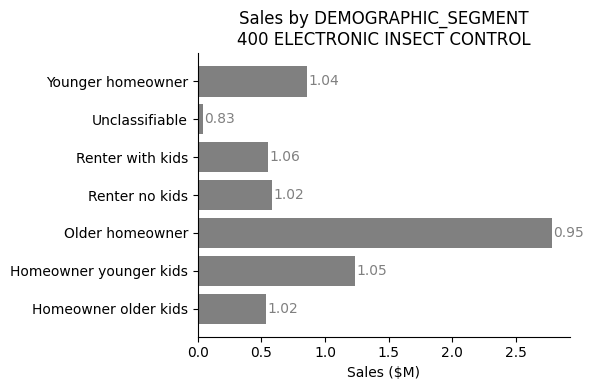

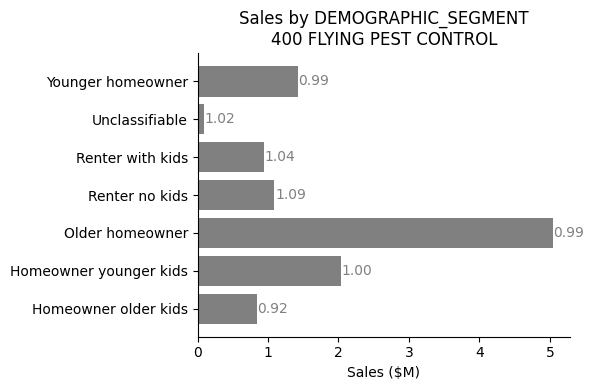

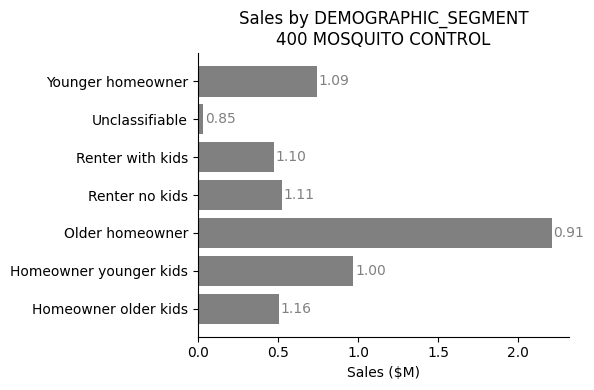

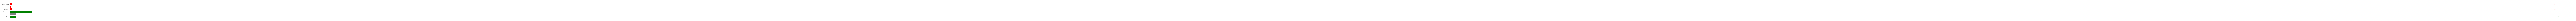

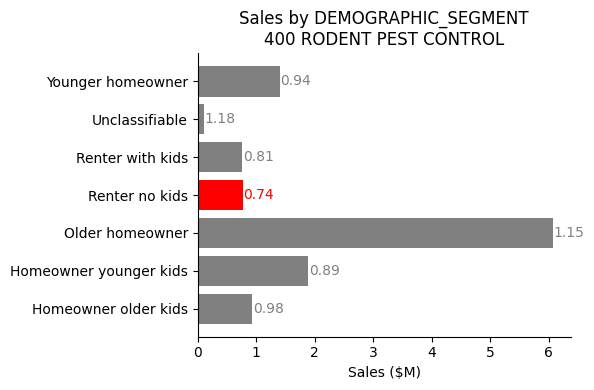

In [9]:
generate_segment_charts(df=PC_ds, field="DEMOGRAPHIC_SEGMENT", level="ITEM_SUB_DEPARTMENT_NAME")

## DIY

In [10]:
# Get data
PC_diy = con.read_sql_file_into_pandas(
    file="sql/2-diy-proficiency.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_PC,
        'level' : 'item_sub_department_name',
        'country' : 'AU' 
    }
)

In [11]:
# Check data
PC_diy.head(7)

,ITEM_SUB_DEPARTMENT_NAME,PROFICIENCY_GROUP,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,400 ANIMAL CONTROL,DIY Maintainer,480774.06,22917.0,16321,1768268.76,82641.0,58926,12532062.18,1106992.0,...,1375961,0.271890,0.277308,0.276975,0.260157,0.265380,0.267331,1.045099,1.044948,1.036075
1,400 ANIMAL CONTROL,DIY Master,405377.57,17266.0,12325,1768268.76,82641.0,58926,12149191.36,999248.0,...,1375961,0.229251,0.208928,0.209161,0.252209,0.239550,0.227660,0.908974,0.872167,0.918743
2,400 ANIMAL CONTROL,DIY Rookie,385434.73,19681.0,14147,1768268.76,82641.0,58926,9743544.08,890774.0,...,1375961,0.217973,0.238151,0.240081,0.202269,0.213546,0.229739,1.077638,1.115221,1.045016
3,400 ANIMAL CONTROL,DIY Skilled,496682.40,22777.0,16133,1768268.76,82641.0,58926,13746373.22,1174338.0,...,1375961,0.280886,0.275614,0.273784,0.285365,0.281525,0.275270,0.984305,0.979004,0.994602
4,400 CRAWLING PEST CONTROL,DIY Maintainer,4057582.22,328344.0,170755,15585425.40,1238771.0,636397,12532062.18,1106992.0,...,1375961,0.260345,0.265056,0.268315,0.260157,0.265380,0.267331,1.000722,0.998781,1.003681
5,400 CRAWLING PEST CONTROL,DIY Master,3950278.96,298085.0,145538,15585425.40,1238771.0,636397,12149191.36,999248.0,...,1375961,0.253460,0.240630,0.228691,0.252209,0.239550,0.227660,1.004960,1.004506,1.004529
6,400 CRAWLING PEST CONTROL,DIY Rookie,3108046.71,262766.0,143539,15585425.40,1238771.0,636397,9743544.08,890774.0,...,1375961,0.199420,0.212118,0.225549,0.202269,0.213546,0.229739,0.985914,0.993316,0.981762


/tmp/ipykernel_27318/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


{'400 ANIMAL CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 CRAWLING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 ELECTRONIC INSECT CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 FLYING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 MOSQUITO CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 PEST CONTROL OFF RANGE': <Figure size 600x400 with 1 Axes>,
 '400 RODENT PEST CONTROL': <Figure size 600x400 with 1 Axes>}

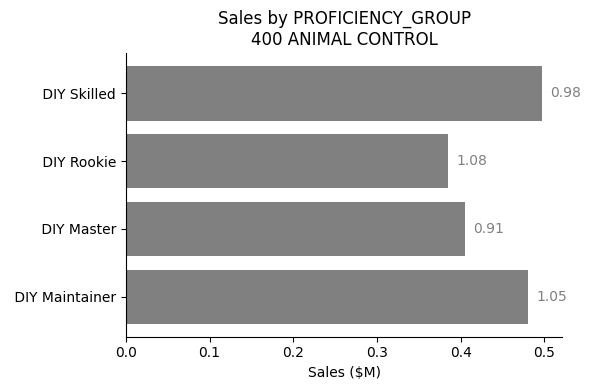

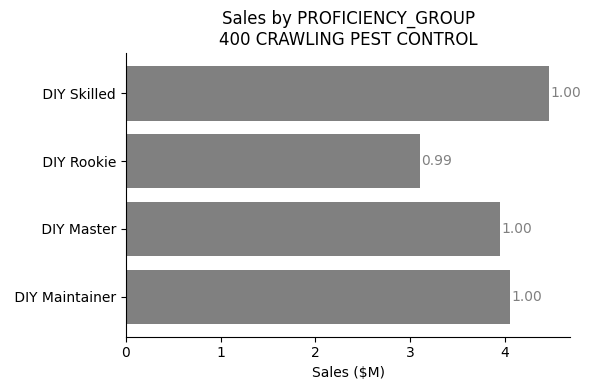

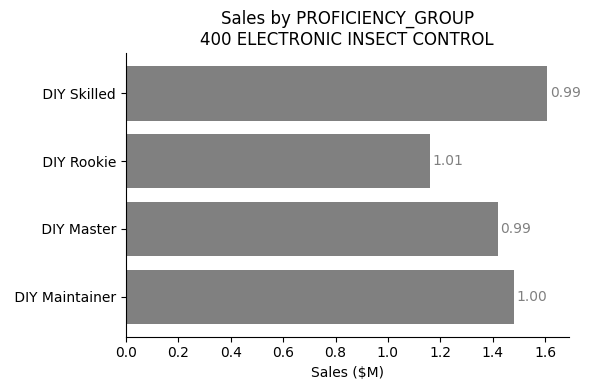

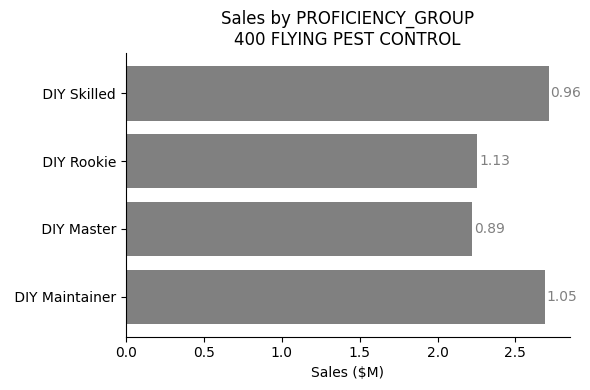

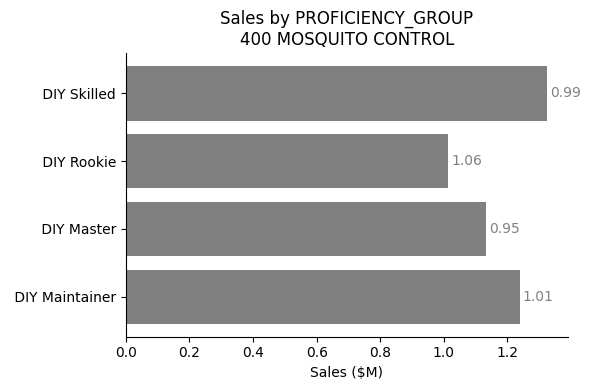

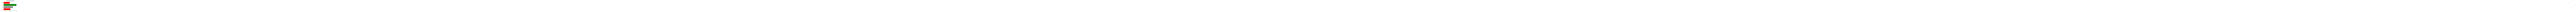

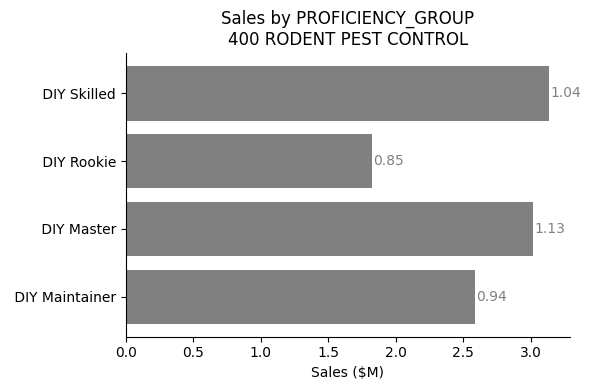

In [12]:
generate_segment_charts(df=PC_diy, field="PROFICIENCY_GROUP", level="ITEM_SUB_DEPARTMENT_NAME")

## RFM (Annual Segment)

In [13]:
# Get data
PC_rfm = con.read_sql_file_into_pandas(
    file="sql/3-rfm.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_PC,
        'level' : 'item_sub_department_name',
        'country' : 'AU' 
    }
)

In [14]:
# Check data
PC_rfm.head()

,ITEM_SUB_DEPARTMENT_NAME,ANNUAL_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,400 ANIMAL CONTROL,High Spend High Frequency,1045679.25,46715.0,31508,1932103.20,90117.0,64248,26247395.94,2185628.0,...,1520717,0.541213,0.518382,0.490412,0.497800,0.478086,0.399118,1.087211,1.084285,1.228739
1,400 ANIMAL CONTROL,High Spend Low Frequency,345782.74,14898.0,10896,1932103.20,90117.0,64248,10045806.53,832041.0,...,1520717,0.178967,0.165318,0.169593,0.190525,0.182001,0.200958,0.939334,0.908336,0.843923
2,400 ANIMAL CONTROL,Low Spend High Frequency,291027.91,15649.0,11685,1932103.20,90117.0,64248,8130547.77,781012.0,...,1520717,0.150628,0.173652,0.181873,0.154201,0.170839,0.181163,0.976824,1.016464,1.003919
3,400 ANIMAL CONTROL,Low Spend Low Frequency,249613.30,12855.0,10159,1932103.20,90117.0,64248,8303085.96,772937.0,...,1520717,0.129193,0.142648,0.158122,0.157474,0.169073,0.218762,0.820407,0.843706,0.722804
4,400 CRAWLING PEST CONTROL,High Spend High Frequency,8116138.38,624712.0,293385,17138430.36,1365686.0,704043,26247395.94,2185628.0,...,1520717,0.473564,0.457435,0.416715,0.497800,0.478086,0.399118,0.951314,0.956803,1.044090


/tmp/ipykernel_27318/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


{'400 ANIMAL CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 CRAWLING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 ELECTRONIC INSECT CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 FLYING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 MOSQUITO CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 PEST CONTROL OFF RANGE': <Figure size 600x400 with 1 Axes>,
 '400 RODENT PEST CONTROL': <Figure size 600x400 with 1 Axes>}

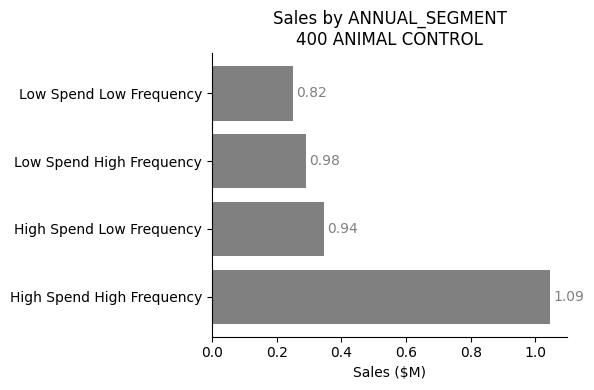

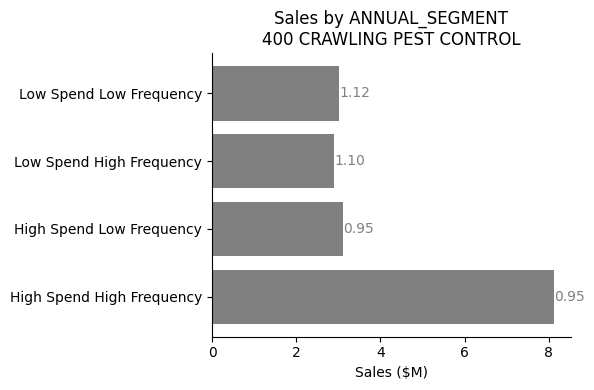

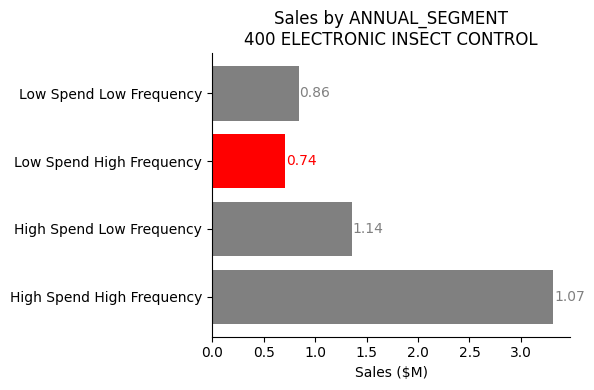

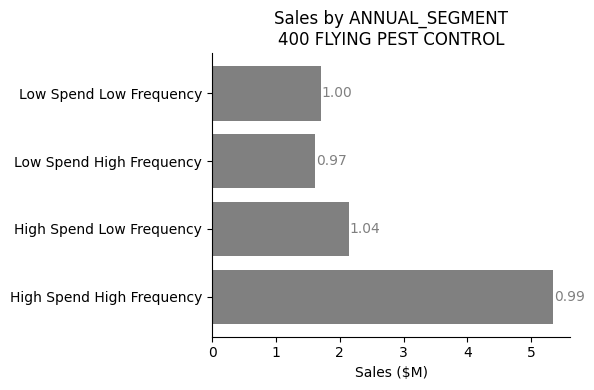

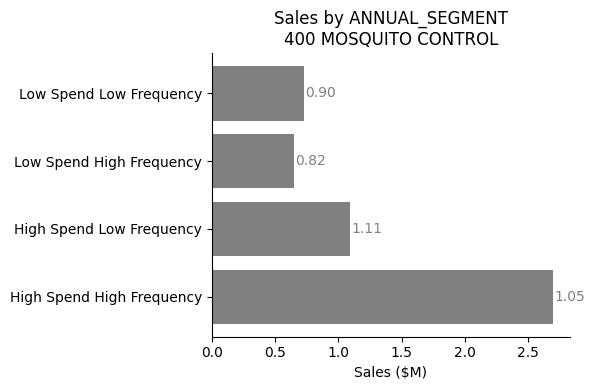

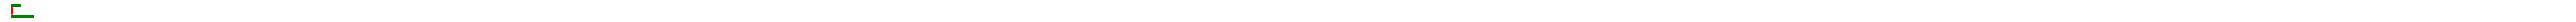

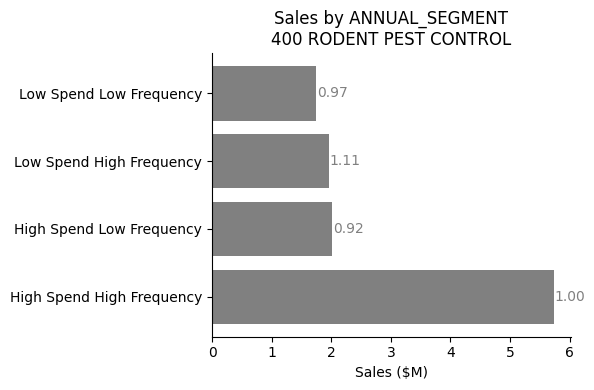

In [15]:
generate_segment_charts(df=PC_rfm, field="ANNUAL_SEGMENT", level="ITEM_SUB_DEPARTMENT_NAME")

## Commercial BOT

In [16]:
# Get data
PC_bot = con.read_sql_file_into_pandas(
    file="sql/4-commercial-bot.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_PC,
        'level' : 'item_sub_department_name',
        'country' : 'AU' 
    }
)

In [17]:
# Check data
PC_bot.head()

,ITEM_SUB_DEPARTMENT_NAME,INDUSTRY_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,400 ANIMAL CONTROL,B&O,463745.65,17214.0,11038,803271.73,30594.0,20332,14257330.61,1163751.0,...,472222,0.577321,0.562659,0.542888,0.554058,0.555996,0.518430,1.041987,1.011985,1.047177
1,400 ANIMAL CONTROL,Builder,108444.91,4132.0,2836,803271.73,30594.0,20332,3654932.52,292470.0,...,472222,0.135004,0.135059,0.139485,0.142035,0.139731,0.140267,0.950496,0.966565,0.994425
2,400 ANIMAL CONTROL,Trades,231066.96,9247.0,6457,803271.73,30594.0,20332,7818415.42,636748.0,...,472222,0.287657,0.302249,0.317578,0.303834,0.304214,0.341168,0.946760,0.993540,0.930855
3,400 ANIMAL CONTROL,Unknown,14.21,1.0,1,803271.73,30594.0,20332,1885.63,124.0,...,472222,0.000018,0.000033,0.000049,0.000073,0.000059,0.000136,0.241412,0.551735,0.360294
4,400 CRAWLING PEST CONTROL,B&O,4470082.87,360737.0,127932,8081389.66,637868.0,243943,14257330.61,1163751.0,...,472222,0.553133,0.565536,0.524434,0.554058,0.555996,0.518430,0.998331,1.017158,1.011581


/tmp/ipykernel_27318/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


{'400 ANIMAL CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 CRAWLING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 ELECTRONIC INSECT CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 FLYING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 MOSQUITO CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 PEST CONTROL OFF RANGE': <Figure size 600x400 with 1 Axes>,
 '400 RODENT PEST CONTROL': <Figure size 600x400 with 1 Axes>}

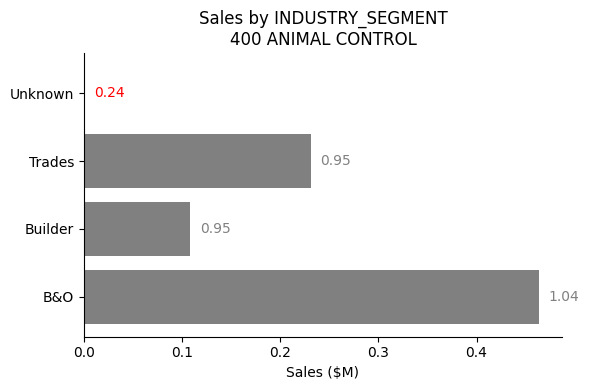

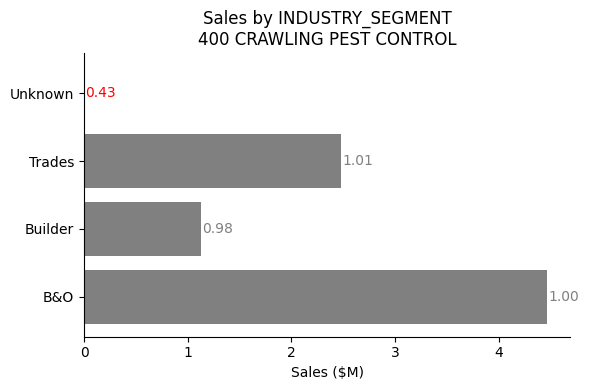

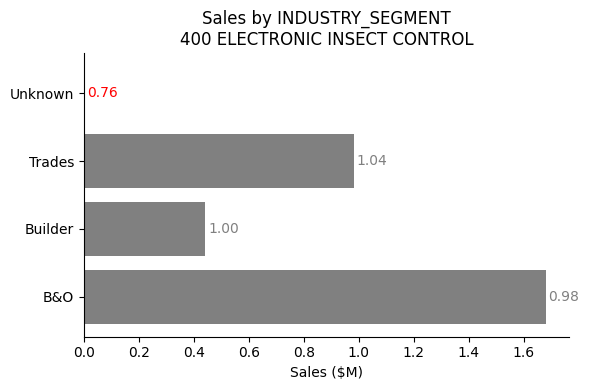

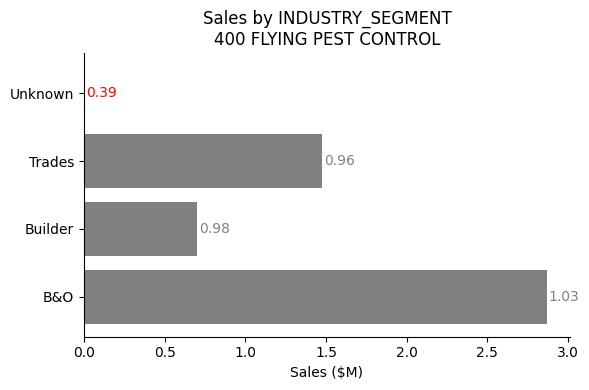

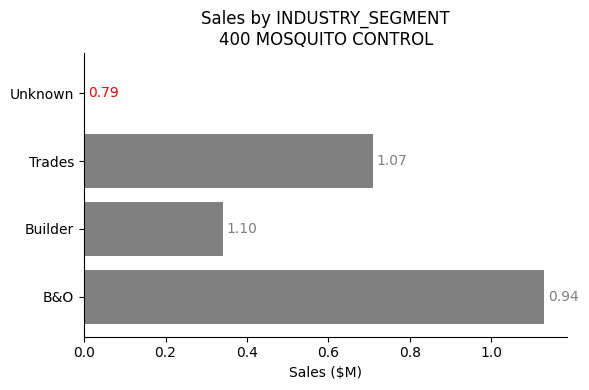

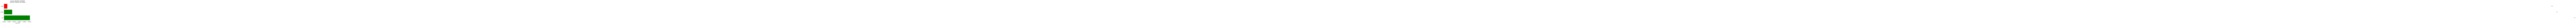

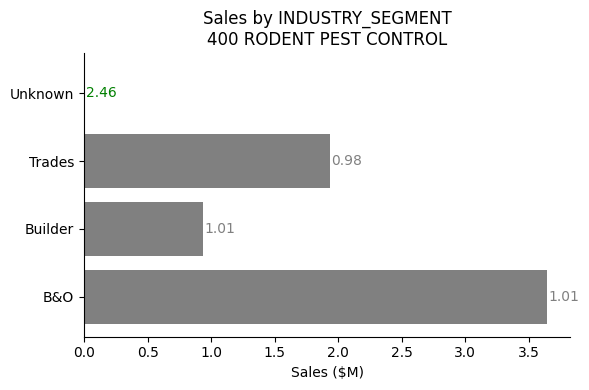

In [18]:
generate_segment_charts(df=PC_bot, field="INDUSTRY_SEGMENT", level="ITEM_SUB_DEPARTMENT_NAME")

## Commercial Industry Segment

In [19]:
# Get data
PC_is = con.read_sql_file_into_pandas(
    file="sql/5-commercial-industry-segment.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'n_commercial_segments': 10, 
        'table_name': table_PC,
        'level' : 'item_sub_department_name',
        'country' : 'AU' 
    }
)

In [20]:
# Check data
PC_is.sort_values(by='SALES_INDEX', ascending=False)

,ITEM_SUB_DEPARTMENT_NAME,INDUSTRY_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
52,400 PEST CONTROL OFF RANGE,Commercial Builder,18.18,1.0,1,35.55,5.0,5,725774.04,57522.0,...,269384,0.511392,0.200000,0.200000,0.050540,0.049019,0.048154,10.118585,4.080060,4.153341
50,400 PEST CONTROL OFF RANGE,Accommodation and Food Services,10.91,1.0,1,35.55,5.0,5,1591150.91,135020.0,...,269384,0.306892,0.200000,0.200000,0.110801,0.115061,0.096984,2.769751,1.738211,2.062196
53,400 PEST CONTROL OFF RANGE,Landscaper and Gardening Services,6.37,2.0,2,35.55,5.0,5,1065915.11,86618.0,...,269384,0.179184,0.400000,0.400000,0.074226,0.073814,0.081839,2.414038,5.419040,4.887645
24,400 ELECTRONIC INSECT CONTROL,Electrical Services,197142.23,4853.0,2907,1742835.30,44394.0,27663,1291706.13,101999.0,...,269384,0.113116,0.109317,0.105086,0.089949,0.086921,0.092006,1.257554,1.257652,1.142165
5,400 ANIMAL CONTROL,Landscaper and Gardening Services,39673.10,1570.0,1033,440681.08,17074.0,11605,1065915.11,86618.0,...,269384,0.090027,0.091953,0.089013,0.074226,0.073814,0.081839,1.212875,1.245738,1.087660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,400 ELECTRONIC INSECT CONTROL,Cleaning Services,101514.96,2855.0,1880,1742835.30,44394.0,27663,938571.78,79053.0,...,269384,0.058247,0.064310,0.067961,0.065358,0.067367,0.070743,0.891196,0.954628,0.960675
0,400 ANIMAL CONTROL,Accommodation and Food Services,42120.50,1557.0,1098,440681.08,17074.0,11605,1591150.91,135020.0,...,269384,0.095580,0.091191,0.094614,0.110801,0.115061,0.096984,0.862630,0.792548,0.975563
25,400 ELECTRONIC INSECT CONTROL,Landscaper and Gardening Services,111097.12,2903.0,2023,1742835.30,44394.0,27663,1065915.11,86618.0,...,269384,0.063745,0.065392,0.073130,0.074226,0.073814,0.081839,0.858798,0.885901,0.893584
4,400 ANIMAL CONTROL,Electrical Services,31984.88,1324.0,961,440681.08,17074.0,11605,1291706.13,101999.0,...,269384,0.072581,0.077545,0.082809,0.089949,0.086921,0.092006,0.806907,0.892128,0.900039


/tmp/ipykernel_27318/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


{'400 ANIMAL CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 CRAWLING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 ELECTRONIC INSECT CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 FLYING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 MOSQUITO CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 PEST CONTROL OFF RANGE': <Figure size 600x400 with 1 Axes>,
 '400 RODENT PEST CONTROL': <Figure size 600x400 with 1 Axes>}

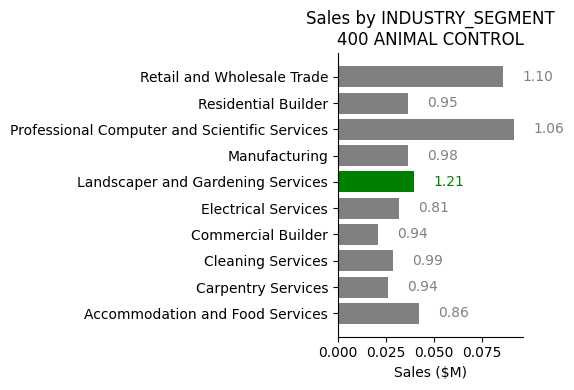

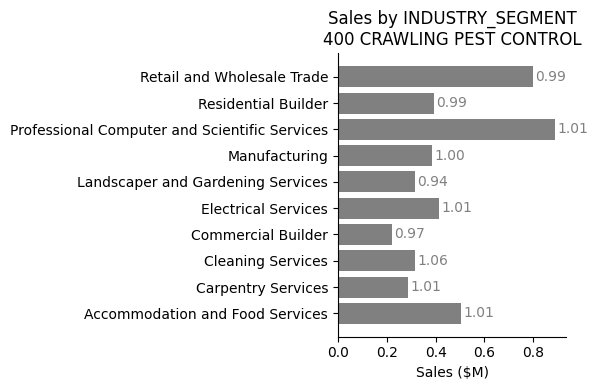

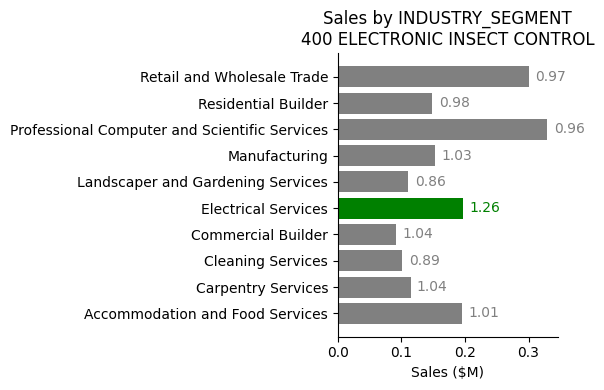

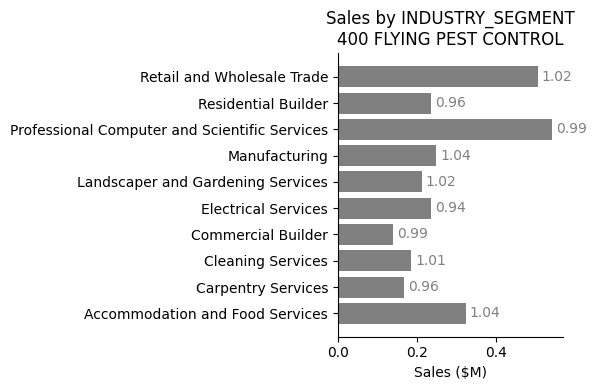

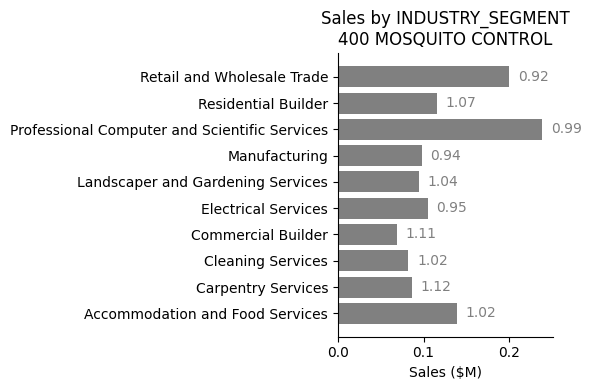

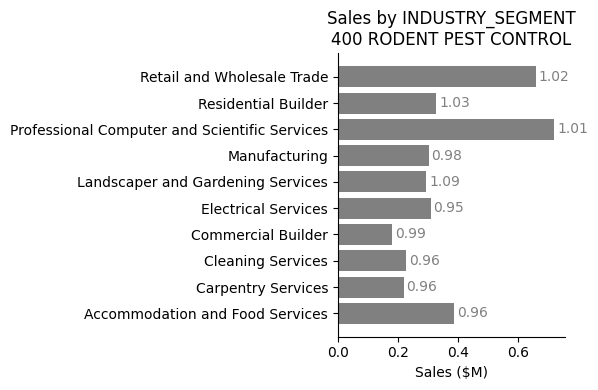

In [22]:
generate_segment_charts(df=PC_is, field="INDUSTRY_SEGMENT", level="ITEM_SUB_DEPARTMENT_NAME")

## Drop item range table

In [23]:
# Drop item range table
con.execute_statement_from_sql_string(
    statement='DROP TABLE bdwprd_de.ia_merch_de.{table_name};',
    formatting={'table_name': table_PC}
    )

# 400 GROWING MEDIA

## Data

In [24]:
# Set item range table name
table_GM = 'GM_item_range' + datetime.today().strftime('%Y_%m_%d')

In [25]:
# Create temp item table
con.execute_statement_from_sql_file(
    file='sql/0-item-range.sql',
    formatting={'table_name': table_GM,
                'filter' : "AND item_sub_department_name = '400 GROWING MEDIA' "})

## Demographic Segments (AU)

In [26]:
GM_ds = con.read_sql_file_into_pandas(
    file="sql/1-demographic-segments.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_GM,
        'level' : 'item_class_name',
        'country' : 'AU' 
    }
)

In [27]:
# Check data
GM_ds.head()

,ITEM_CLASS_NAME,DEMOGRAPHIC_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,500 COIR MULCH BLOCK HYDRO,Homeowner older kids,94860.63,5008.0,2543,1156035.77,60571.0,30285,11694301.93,1367538.0,...,2585243,0.082057,0.082680,0.083969,0.072723,0.073778,0.073882,1.128351,1.120652,1.136529
1,500 COIR MULCH BLOCK HYDRO,Homeowner younger kids,181226.80,9553.0,4923,1156035.77,60571.0,30285,22027213.62,2607264.0,...,2585243,0.156766,0.157716,0.162556,0.136980,0.140661,0.141612,1.144446,1.121245,1.147897
2,500 COIR MULCH BLOCK HYDRO,Older homeowner,543632.24,27752.0,13279,1156035.77,60571.0,30285,87828395.20,9992028.0,...,2585243,0.470256,0.458173,0.438468,0.546174,0.539067,0.487653,0.860999,0.849937,0.899139
3,500 COIR MULCH BLOCK HYDRO,Renter no kids,83486.45,4679.0,2816,1156035.77,60571.0,30285,9185339.84,1091963.0,...,2585243,0.072218,0.077248,0.092983,0.057120,0.058911,0.104014,1.264309,1.311266,0.893947
4,500 COIR MULCH BLOCK HYDRO,Renter with kids,45757.49,2592.0,1611,1156035.77,60571.0,30285,5554777.25,684938.0,...,2585243,0.039581,0.042793,0.053195,0.034543,0.036952,0.065931,1.145851,1.158056,0.806828


{'500 COIR MULCH BLOCK HYDRO': <Figure size 600x400 with 1 Axes>,
 '500 COIR POTTING MIX BLOCK': <Figure size 600x400 with 1 Axes>,
 '500 COMPOSTS SOIL CONDITIONERS': <Figure size 600x400 with 1 Axes>,
 '500 MANURE': <Figure size 600x400 with 1 Axes>,
 '500 MULCHES': <Figure size 600x400 with 1 Axes>,
 '500 POTTING MIXES': <Figure size 600x400 with 1 Axes>,
 '500 SMALL BAG POTTING MIX': <Figure size 600x400 with 1 Axes>}

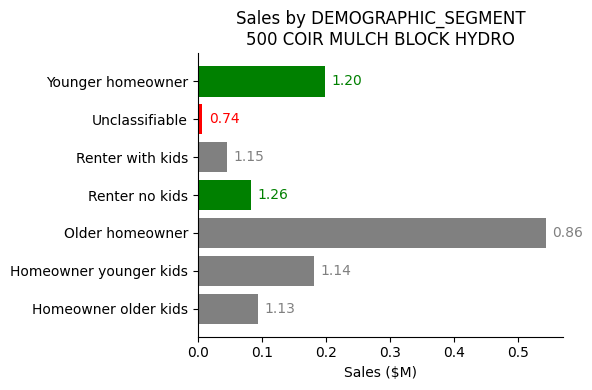

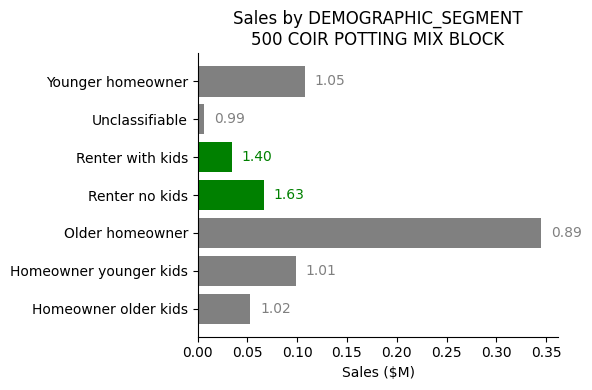

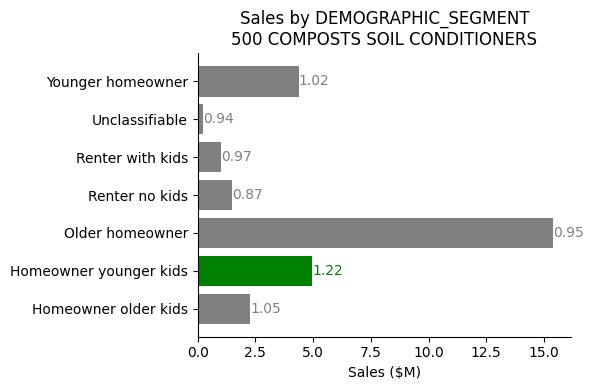

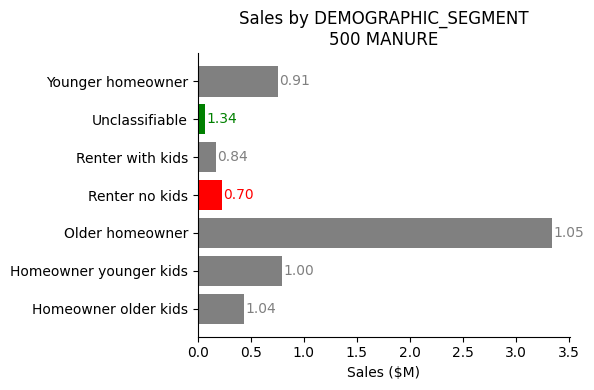

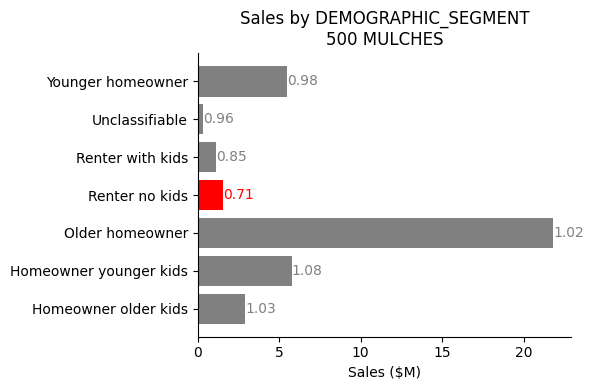

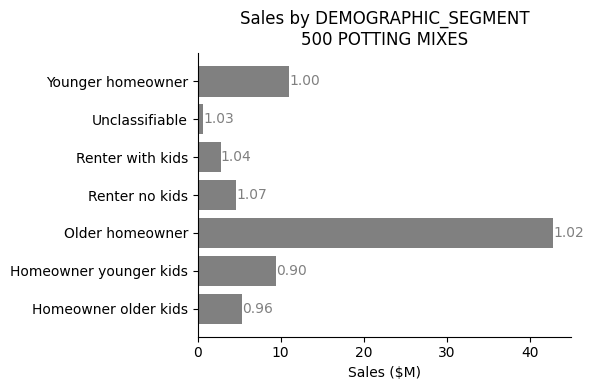

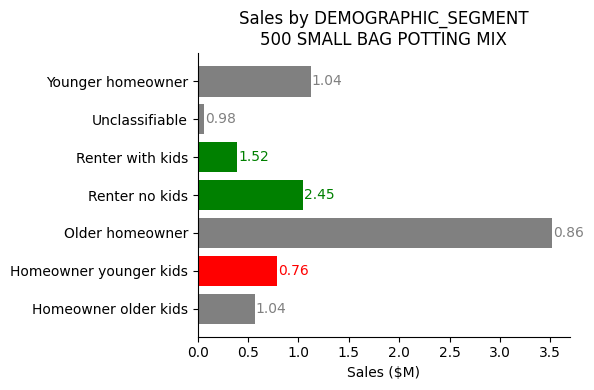

In [28]:
generate_segment_charts(df=GM_ds, field="DEMOGRAPHIC_SEGMENT", level="ITEM_CLASS_NAME")

## DIY

In [29]:
# Get data
GM_diy = con.read_sql_file_into_pandas(
    file="sql/2-diy-proficiency.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_GM,
        'level' : 'item_class_name',
        'country' : 'AU' 
    }
)

In [30]:
# Check data
GM_diy.head()

,ITEM_CLASS_NAME,PROFICIENCY_GROUP,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,500 COIR MULCH BLOCK HYDRO,DIY Maintainer,269267.64,13925.0,6894,1019264.26,53034.0,26079,39035932.26,4503247.0,...,2157824,0.264178,0.262567,0.264351,0.275244,0.276231,0.272816,0.959799,0.950536,0.968972
1,500 COIR MULCH BLOCK HYDRO,DIY Master,257399.82,13494.0,6207,1019264.26,53034.0,26079,29660408.99,3381436.0,...,2157824,0.252535,0.254441,0.238008,0.209136,0.207419,0.202178,1.207513,1.226700,1.177220
2,500 COIR MULCH BLOCK HYDRO,DIY Rookie,207411.39,10801.0,5907,1019264.26,53034.0,26079,33949818.06,3928522.0,...,2157824,0.203491,0.203662,0.226504,0.239381,0.240977,0.258555,0.850072,0.845150,0.876038
3,500 COIR MULCH BLOCK HYDRO,DIY Skilled,285185.41,14814.0,7071,1019264.26,53034.0,26079,39177096.97,4489264.0,...,2157824,0.279795,0.279330,0.271138,0.276239,0.275373,0.266450,1.012875,1.014370,1.017594
4,500 COIR POTTING MIX BLOCK,DIY Maintainer,169377.56,19989.0,11500,622227.56,74133.0,42696,39035932.26,4503247.0,...,2157824,0.272212,0.269637,0.269346,0.275244,0.276231,0.272816,0.988985,0.976129,0.987281


{'500 COIR MULCH BLOCK HYDRO': <Figure size 600x400 with 1 Axes>,
 '500 COIR POTTING MIX BLOCK': <Figure size 600x400 with 1 Axes>,
 '500 COMPOSTS SOIL CONDITIONERS': <Figure size 600x400 with 1 Axes>,
 '500 MANURE': <Figure size 600x400 with 1 Axes>,
 '500 MULCHES': <Figure size 600x400 with 1 Axes>,
 '500 POTTING MIXES': <Figure size 600x400 with 1 Axes>,
 '500 SMALL BAG POTTING MIX': <Figure size 600x400 with 1 Axes>}

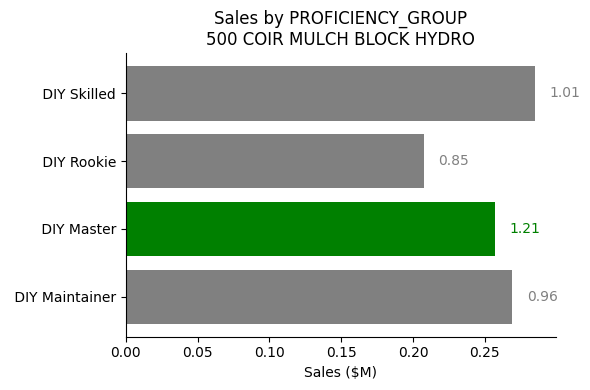

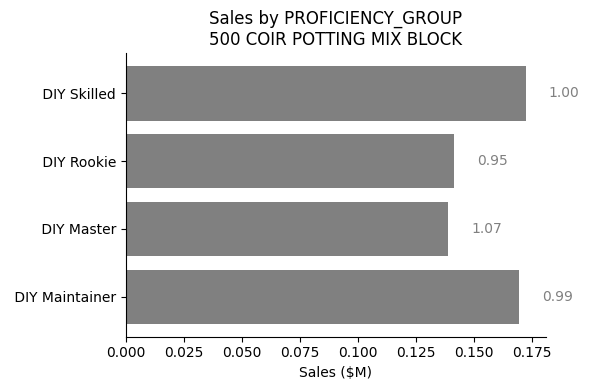

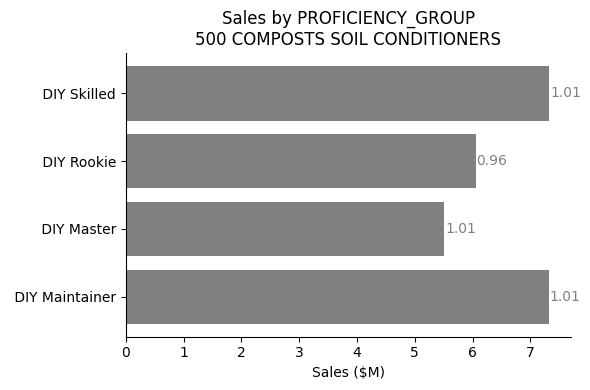

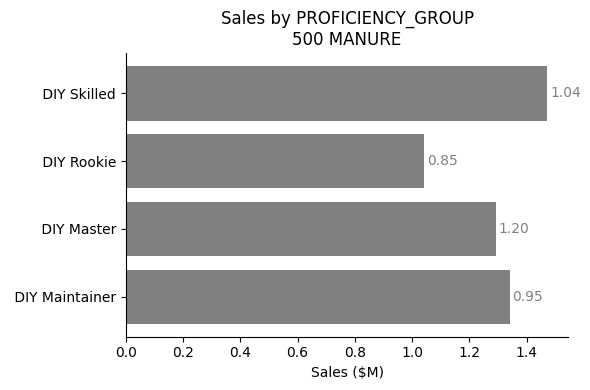

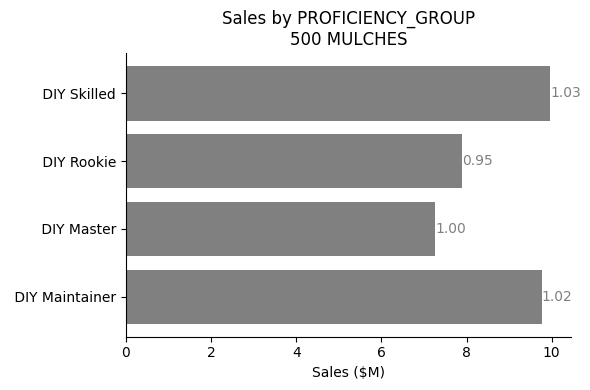

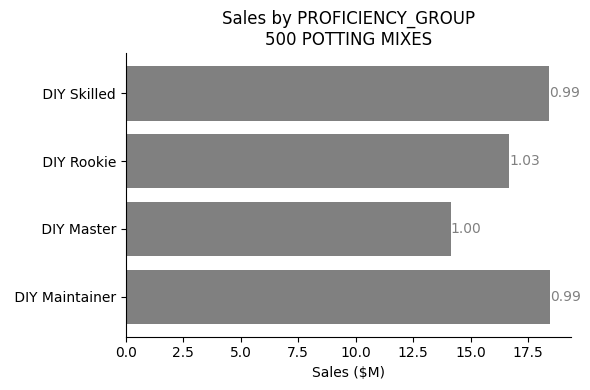

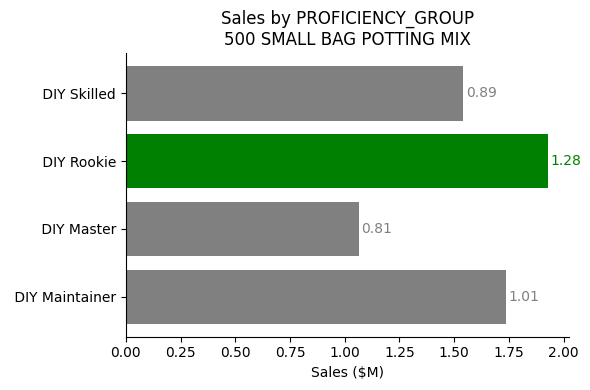

In [31]:
generate_segment_charts(df=GM_diy, field="PROFICIENCY_GROUP", level="ITEM_CLASS_NAME")

## RFM (Annual Segment)

In [32]:
# Get data
GM_rfm = con.read_sql_file_into_pandas(
    file="sql/3-rfm.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_GM,
        'level' : 'item_class_name',
        'country' : 'AU' 
    }
)

In [33]:
# Check data
GM_rfm.head()

,ITEM_CLASS_NAME,ANNUAL_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,500 COIR MULCH BLOCK HYDRO,High Spend High Frequency,671276.61,34589.0,15094,1122656.84,58673.0,29176,81388412.83,9149292.0,...,2418836,0.597936,0.589522,0.517343,0.522653,0.509986,0.359457,1.144039,1.155958,1.439235
1,500 COIR MULCH BLOCK HYDRO,High Spend Low Frequency,193277.77,10130.0,5510,1122656.84,58673.0,29176,26499867.15,2969464.0,...,2418836,0.172161,0.172652,0.188854,0.170175,0.165519,0.212355,1.011673,1.043092,0.889332
2,500 COIR MULCH BLOCK HYDRO,Low Spend High Frequency,144795.22,7757.0,4461,1122656.84,58673.0,29176,26470812.64,3233272.0,...,2418836,0.128975,0.132207,0.152900,0.169988,0.180224,0.185112,0.758733,0.733572,0.825986
3,500 COIR MULCH BLOCK HYDRO,Low Spend Low Frequency,113307.24,6197.0,4111,1122656.84,58673.0,29176,21362490.68,2588270.0,...,2418836,0.100928,0.105619,0.140903,0.137184,0.144271,0.243076,0.735712,0.732088,0.579666
4,500 COIR POTTING MIX BLOCK,High Spend High Frequency,360312.55,41731.0,22484,686224.80,81704.0,47367,81388412.83,9149292.0,...,2418836,0.525065,0.510758,0.474676,0.522653,0.509986,0.359457,1.004614,1.001515,1.320536


{'500 COIR MULCH BLOCK HYDRO': <Figure size 600x400 with 1 Axes>,
 '500 COIR POTTING MIX BLOCK': <Figure size 600x400 with 1 Axes>,
 '500 COMPOSTS SOIL CONDITIONERS': <Figure size 600x400 with 1 Axes>,
 '500 MANURE': <Figure size 600x400 with 1 Axes>,
 '500 MULCHES': <Figure size 600x400 with 1 Axes>,
 '500 POTTING MIXES': <Figure size 600x400 with 1 Axes>,
 '500 SMALL BAG POTTING MIX': <Figure size 600x400 with 1 Axes>}

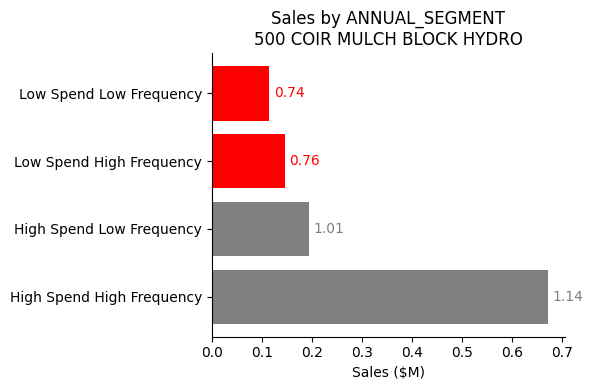

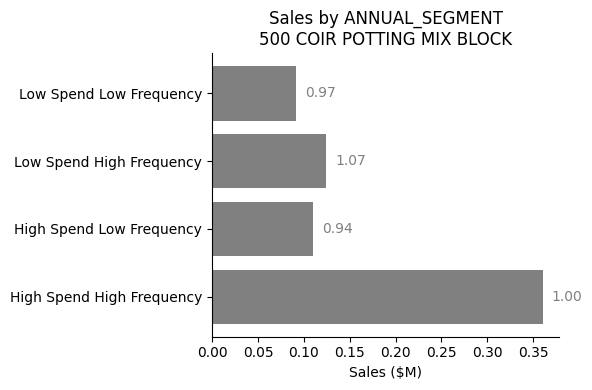

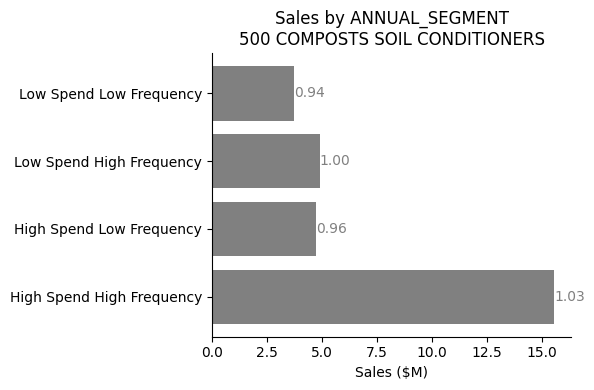

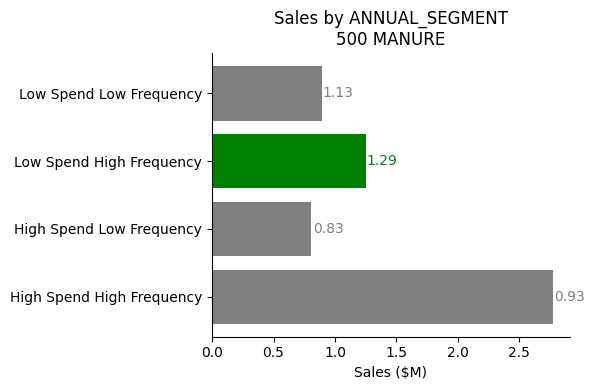

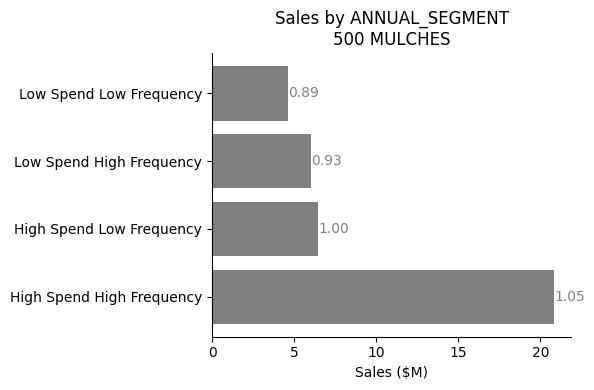

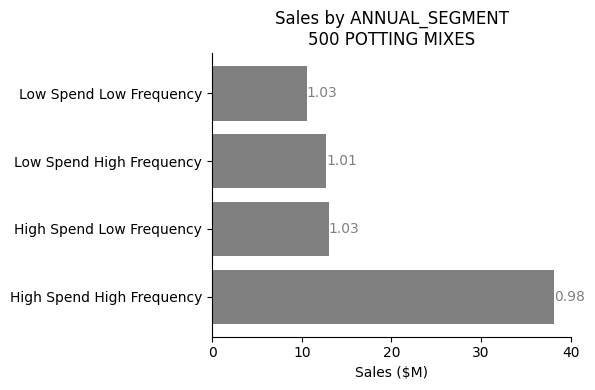

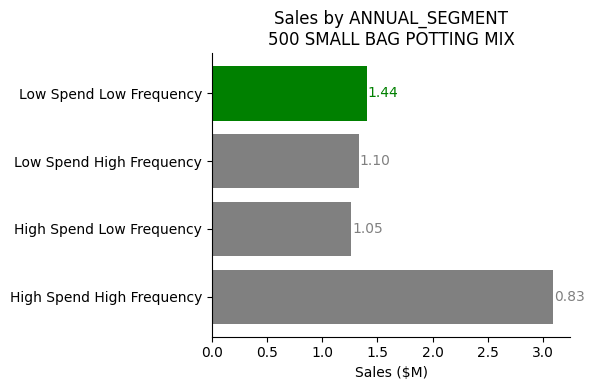

In [34]:
generate_segment_charts(df=GM_rfm, field="ANNUAL_SEGMENT", level="ITEM_CLASS_NAME") 

## Commercial BOT

In [35]:
# Get data
GM_bot = con.read_sql_file_into_pandas(
    file="sql/4-commercial-bot.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_GM,
        'level' : 'item_class_name',
        'country' : 'AU' 
    }
)

In [36]:
# Check data
GM_bot.head()

,ITEM_CLASS_NAME,INDUSTRY_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,500 COIR MULCH BLOCK HYDRO,B&O,272196.77,15392.0,5537,459089.32,26375.0,9783,27239833.64,3114582.0,...,533223,0.592906,0.583583,0.565982,0.541418,0.541739,0.526740,1.095098,1.077240,1.074500
1,500 COIR MULCH BLOCK HYDRO,Builder,47017.22,2788.0,1099,459089.32,26375.0,9783,6500707.89,736847.0,...,533223,0.102414,0.105706,0.112338,0.129208,0.128164,0.133295,0.792630,0.824770,0.842777
2,500 COIR MULCH BLOCK HYDRO,Trades,139862.10,8194.0,3146,459089.32,26375.0,9783,16564445.70,1897023.0,...,533223,0.304651,0.310673,0.321578,0.329235,0.329961,0.339710,0.925332,0.941544,0.946625
3,500 COIR MULCH BLOCK HYDRO,Unknown,13.23,1.0,1,459089.32,26375.0,9783,7011.23,778.0,...,533223,0.000029,0.000038,0.000102,0.000139,0.000135,0.000255,0.206795,0.280180,0.400000
4,500 COIR POTTING MIX BLOCK,B&O,131364.36,16408.0,7807,219630.08,27458.0,13399,27239833.64,3114582.0,...,533223,0.598116,0.597567,0.582655,0.541418,0.541739,0.526740,1.104722,1.103054,1.106153


{'500 COIR MULCH BLOCK HYDRO': <Figure size 600x400 with 1 Axes>,
 '500 COIR POTTING MIX BLOCK': <Figure size 600x400 with 1 Axes>,
 '500 COMPOSTS SOIL CONDITIONERS': <Figure size 600x400 with 1 Axes>,
 '500 MANURE': <Figure size 600x400 with 1 Axes>,
 '500 MULCHES': <Figure size 600x400 with 1 Axes>,
 '500 POTTING MIXES': <Figure size 600x400 with 1 Axes>,
 '500 SMALL BAG POTTING MIX': <Figure size 600x400 with 1 Axes>}

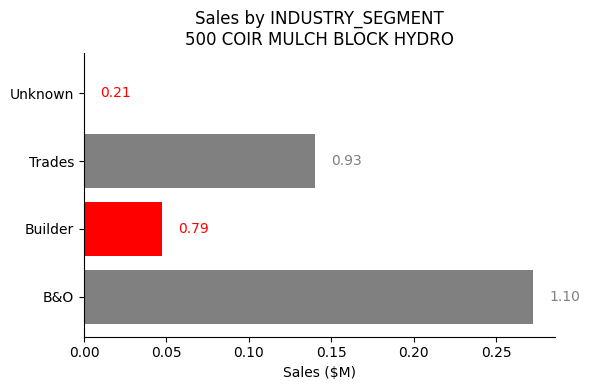

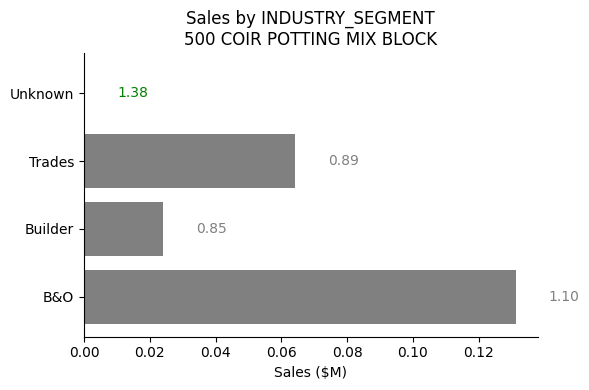

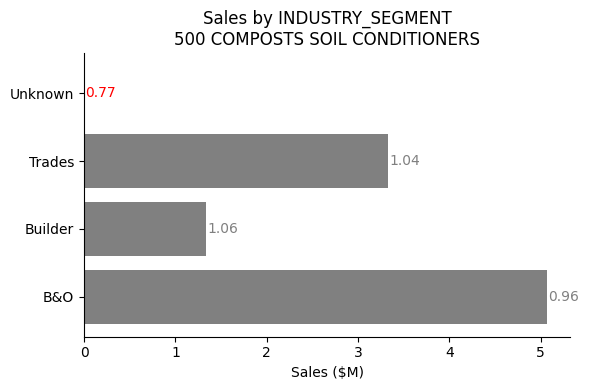

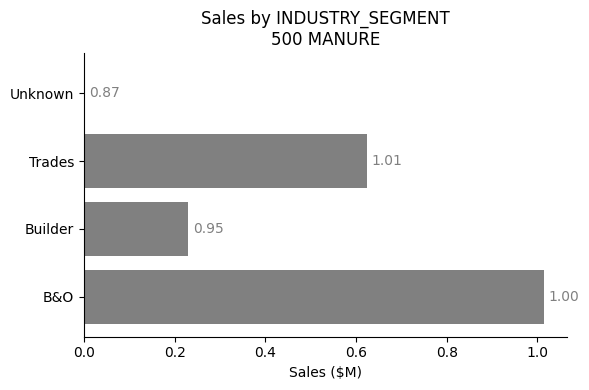

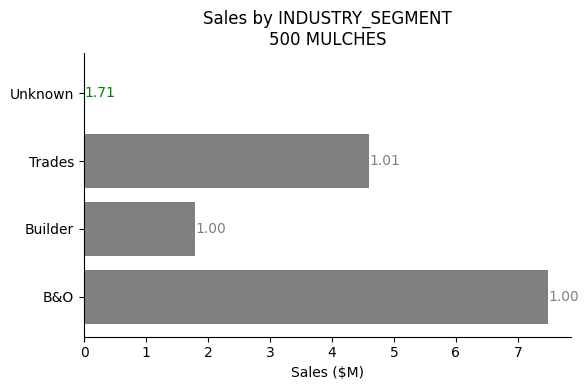

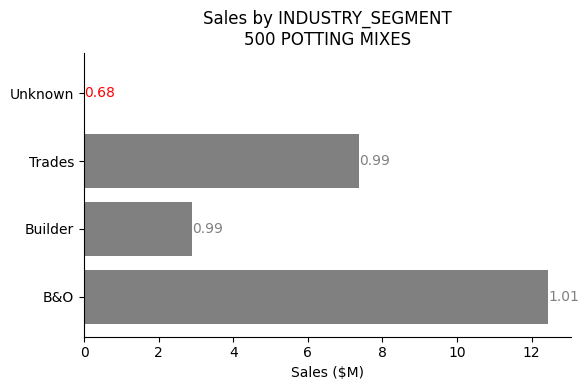

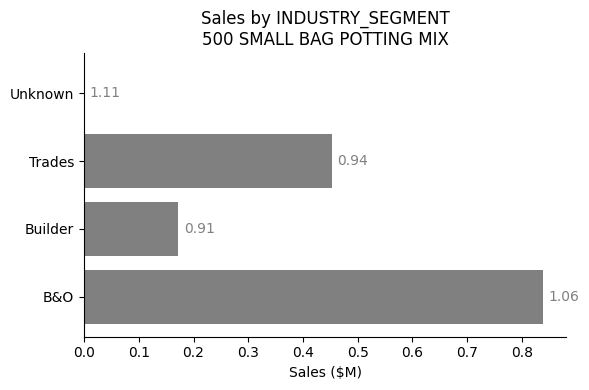

In [37]:
generate_segment_charts(df=GM_bot, field="INDUSTRY_SEGMENT", level="ITEM_CLASS_NAME")

## Commercial Industry Segment

In [38]:
# Get data
GM_is = con.read_sql_file_into_pandas(
    file="sql/5-commercial-industry-segment.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'n_commercial_segments': 10, 
        'table_name': table_GM,
        'level' : 'item_class_name',
        'country' : 'AU' 
    }
)

In [39]:
# Check data
GM_is.sort_values(by='SALES_INDEX', ascending=False)

,ITEM_CLASS_NAME,INDUSTRY_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,500 COIR MULCH BLOCK HYDRO,Accommodation and Food Services,31344.55,1776.0,605,263448.50,14866.0,5660,2709718.21,312885.0,...,308507,0.118978,0.119467,0.106890,0.091868,0.092990,0.095599,1.295099,1.284736,1.118108
9,500 COIR MULCH BLOCK HYDRO,Retail and Wholesale Trade,52357.34,2902.0,1043,263448.50,14866.0,5660,4873553.93,558330.0,...,308507,0.198738,0.195211,0.184276,0.165228,0.165936,0.166350,1.202810,1.176419,1.107761
19,500 COIR POTTING MIX BLOCK,Retail and Wholesale Trade,25169.77,3159.0,1472,129542.68,16214.0,7865,4873553.93,558330.0,...,308507,0.194297,0.194832,0.187158,0.165228,0.165936,0.166350,1.175930,1.174135,1.125086
10,500 COIR POTTING MIX BLOCK,Accommodation and Food Services,13918.07,1694.0,847,129542.68,16214.0,7865,2709718.21,312885.0,...,308507,0.107440,0.104478,0.107692,0.091868,0.092990,0.095599,1.169507,1.123539,1.126497
30,500 MANURE,Accommodation and Food Services,116040.69,22736.0,4520,1114591.59,219512.0,43295,2709718.21,312885.0,...,308507,0.104111,0.103575,0.104400,0.091868,0.092990,0.095599,1.133265,1.113835,1.092062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,500 COIR POTTING MIX BLOCK,Landscaper and Gardening Services,16866.77,1953.0,960,129542.68,16214.0,7865,4607430.57,513980.0,...,308507,0.130202,0.120451,0.122060,0.156206,0.152755,0.097823,0.833530,0.788525,1.247764
13,500 COIR POTTING MIX BLOCK,Commercial Builder,4187.36,511.0,233,129542.68,16214.0,7865,1267089.45,143424.0,...,308507,0.032324,0.031516,0.029625,0.042958,0.042626,0.044479,0.752456,0.739365,0.666045
65,500 SMALL BAG POTTING MIX,Landscaper and Gardening Services,95862.98,10902.0,5131,842995.48,100065.0,52035,4607430.57,513980.0,...,308507,0.113717,0.108949,0.098607,0.156206,0.152755,0.097823,0.727994,0.713226,1.008014
3,500 COIR MULCH BLOCK HYDRO,Commercial Builder,7784.12,469.0,212,263448.50,14866.0,5660,1267089.45,143424.0,...,308507,0.029547,0.031548,0.037456,0.042958,0.042626,0.044479,0.687808,0.740128,0.842105


{'500 COIR MULCH BLOCK HYDRO': <Figure size 600x400 with 1 Axes>,
 '500 COIR POTTING MIX BLOCK': <Figure size 600x400 with 1 Axes>,
 '500 COMPOSTS SOIL CONDITIONERS': <Figure size 600x400 with 1 Axes>,
 '500 MANURE': <Figure size 600x400 with 1 Axes>,
 '500 MULCHES': <Figure size 600x400 with 1 Axes>,
 '500 POTTING MIXES': <Figure size 600x400 with 1 Axes>,
 '500 SMALL BAG POTTING MIX': <Figure size 600x400 with 1 Axes>}

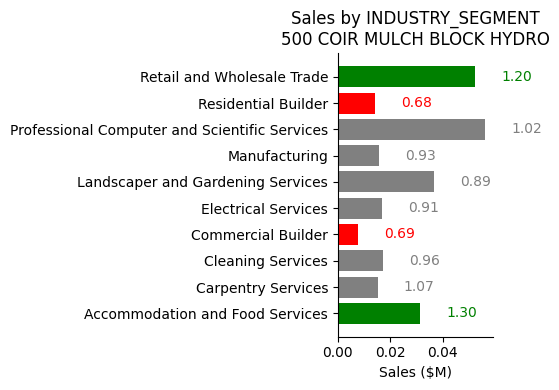

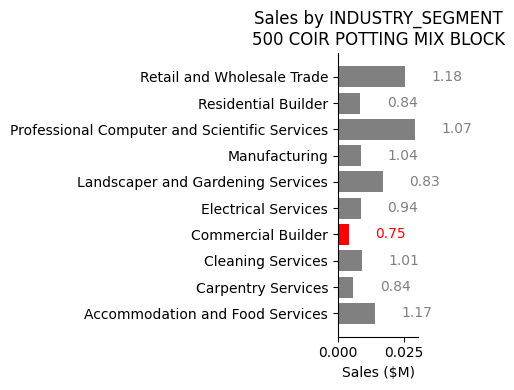

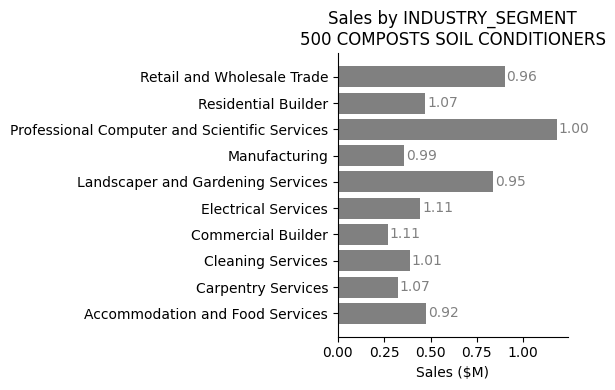

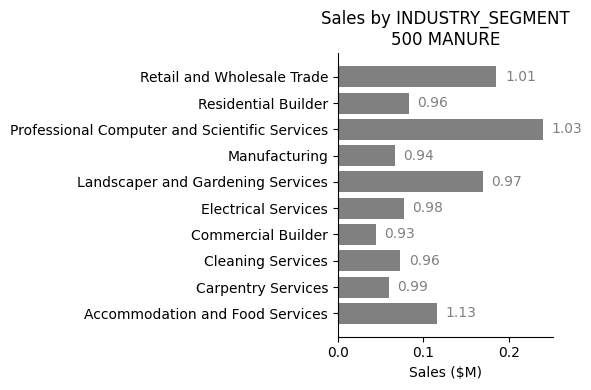

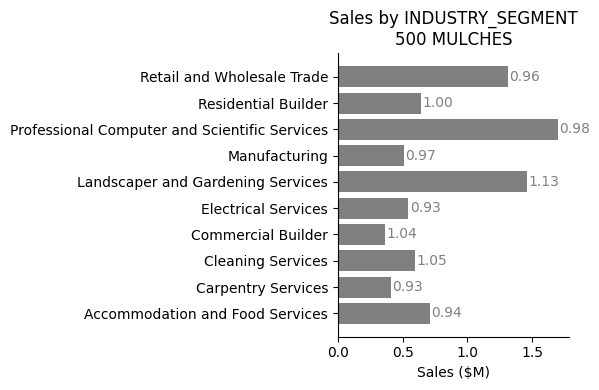

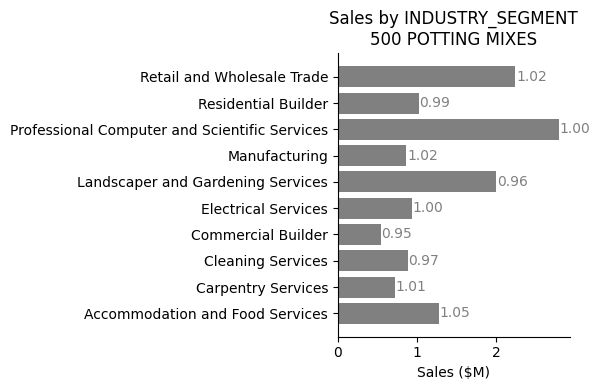

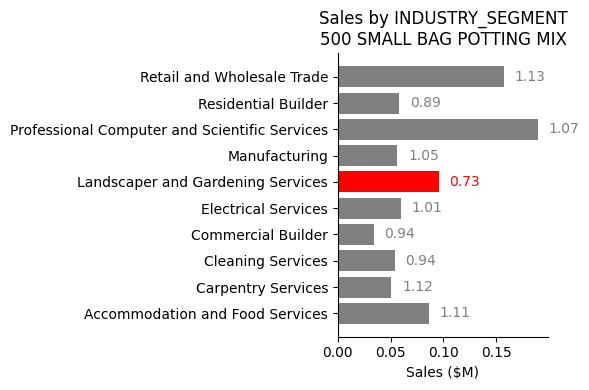

In [40]:
generate_segment_charts(df=GM_is, field="INDUSTRY_SEGMENT", level="ITEM_CLASS_NAME")

## Drop item range table

In [41]:
# Drop item range table
con.execute_statement_from_sql_string(
    statement='DROP TABLE bdwprd_de.ia_merch_de.{table_name};',
    formatting={'table_name': table_GM}
    )